In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
# IMDB datasets
titles_imdb = pd.read_csv('imdb/title.basics.tsv.gz', sep='\t', compression = 'infer')
ratings_imdb = pd.read_csv('imdb/title.ratings.tsv.gz', sep='\t', compression = 'infer')

/var/folders/6k/g222zmkd5n9702hv3gdmx26h0000gn/T/ipykernel_13837/3948717211.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles_imdb = pd.read_csv('imdb/title.basics.tsv.gz', sep='\t', compression = 'infer')


In [3]:
titles_imdb.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [4]:
ratings_imdb.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1922
1,tt0000002,5.8,259
2,tt0000003,6.5,1734
3,tt0000004,5.6,174
4,tt0000005,6.2,2545
5,tt0000006,5.1,175
6,tt0000007,5.4,797
7,tt0000008,5.4,2064
8,tt0000009,5.2,200
9,tt0000010,6.9,6965


In [5]:
movie = pd.read_csv('./MS_decomp/MovieSummaries/movie.metadata.tsv', 
                 sep='\t',
                 names=['Wikipedia_movie_ID',
                        'Freebase_movie_ID',
                        'Movie_name',
                        'Movie_release_date',
                        'Movie_box_office_revenue',
                        'Movie_runtime',
                        'Movie_languages',
                        'Movie_countries',
                        'Movie_genres'],
                 header=None)

In [6]:
character = pd.read_csv('./MS_decomp/MovieSummaries/character.metadata.tsv', 
                 sep='\t',
                 names=['Wikipedia_movie_ID',
                        'Freebase_movie_ID',
                        'Movie_release_date',
                        'Character_name',
                        'Actor_date_of_birth',
                        'Actor_gender',
                        'Actor_height',
                        'Actor_ethnicity',
                        'Actor_name',
                        'Actor_age_at_movie_release',
                        'Freebase_character/actor_map_ID',
                        'Freebase_character_ID',
                        'Freebase_actor_ID'],
                 header=None)

In [7]:
movie.head(5)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [8]:
character.head(5)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


# Data cleaning

### Date change

In [9]:
#move release dates and actor birth dates to datetime format and keep only release year
character.Movie_release_date = pd.to_datetime(character['Movie_release_date'],
                                              errors='coerce').dt.year

movie.Movie_release_date = pd.to_datetime(movie['Movie_release_date'],
                                              errors='coerce').dt.year

In [10]:
#sort dataframes by ascending release year
character.sort_values(by=['Movie_release_date'], ascending=True, inplace=True)

movie.sort_values(by=['Movie_release_date'], ascending=True, inplace=True)

### Null value removal

In [11]:
# Nan percentage for character dataset
character.isnull().sum() * 100 / character.shape[0]

Wikipedia_movie_ID                  0.000000
Freebase_movie_ID                   0.000000
Movie_release_date                  2.221142
Character_name                     57.220488
Actor_date_of_birth                23.552763
Actor_gender                       10.120288
Actor_height                       65.645740
Actor_ethnicity                    76.466542
Actor_name                          0.272484
Actor_age_at_movie_release         35.084064
Freebase_character/actor_map_ID     0.000000
Freebase_character_ID              57.218269
Freebase_actor_ID                   0.180842
dtype: float64

In [12]:
character = character[['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Actor_name', 'Actor_gender', 'Actor_date_of_birth']]
character

,Wikipedia_movie_ID,Freebase_movie_ID,Actor_name,Actor_gender,Actor_date_of_birth
123565,1082508,/m/044ggd,Harriet Hartley,F,NaN
123564,1082508,/m/044ggd,Joseph Whitley,M,NaN
123563,1082508,/m/044ggd,Sarah Whitley,F,NaN
123562,1082508,/m/044ggd,Adolphe Le Prince,M,NaN
72684,644824,/m/02_1qn,William Dickson,M,1860-08-03
...,...,...,...,...,...
450334,29119097,/m/0dlmtgr,Biswajit Chakraborty,M,NaN
450494,17198681,/m/043mrjw,Melissa Errico,F,1970-03-23
450495,17198681,/m/043mrjw,Charlie Sheen,M,1965-09-03
450496,17198681,/m/043mrjw,Renée Estevez,F,1967-04-02


In [13]:
char_no_nan = character.dropna(axis=0, how='any')
char_no_nan

,Wikipedia_movie_ID,Freebase_movie_ID,Actor_name,Actor_gender,Actor_date_of_birth
72684,644824,/m/02_1qn,William Dickson,M,1860-08-03
294940,73372,/m/0jq3g,John Ott,M,1909-10-23
342275,786716,/m/03c6bq,William Dickson,M,1860-08-03
6955,10104497,/m/02q1zd3,James J. Corbett,M,1866-09-01
229796,1090697,/m/025rqhg,Fred Ott,M,1860
...,...,...,...,...,...
450333,29119097,/m/0dlmtgr,Deepankar De,M,1944-07-05
450494,17198681,/m/043mrjw,Melissa Errico,F,1970-03-23
450495,17198681,/m/043mrjw,Charlie Sheen,M,1965-09-03
450496,17198681,/m/043mrjw,Renée Estevez,F,1967-04-02


In [14]:
# Nan percentage for movie dataset
movie.isnull().sum() * 100 / movie.shape[0]

Wikipedia_movie_ID           0.000000
Freebase_movie_ID            0.000000
Movie_name                   0.000000
Movie_release_date           8.444966
Movie_box_office_revenue    89.722416
Movie_runtime               25.018045
Movie_languages              0.000000
Movie_countries              0.000000
Movie_genres                 0.000000
dtype: float64

In [15]:
movie.shape

(81741, 9)

In [16]:
movie_no_nan = movie.dropna(0, inplace= False, how='any')
movie_no_nan.head(5)

/var/folders/6k/g222zmkd5n9702hv3gdmx26h0000gn/T/ipykernel_13837/1235588327.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  movie_no_nan = movie.dropna(0, inplace= False, how='any')


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
50991,1762869,/m/05tz4w,The Squaw Man,1914.0,244700.0,74.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0hfjk"": ""Weste..."
2634,3333,/m/0151l,The Birth of a Nation,1915.0,50000000.0,190.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi..."
24953,4499436,/m/0c5ppr,Way Down East,1920.0,4500000.0,147.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi..."
32124,21135479,/m/05b_29y,Little Lord Fauntleroy,1921.0,900000.0,112.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra..."
40247,1346905,/m/04vl27,The Kid,1921.0,2500000.0,60.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra..."


# Merging IMDB ratings with CMU dataset

In [17]:
# Merging movie titles dataset with ratings dataset
first_merge = titles_imdb.merge(ratings_imdb, how='inner')

In [18]:
# Droping unnecessary columns
imdb = first_merge[['primaryTitle', 'averageRating', 'numVotes']]#.groupby('primaryTitle').mean()
imdb.head(10)

,primaryTitle,averageRating,numVotes
0,Carmencita,5.7,1922
1,Le clown et ses chiens,5.8,259
2,Pauvre Pierrot,6.5,1734
3,Un bon bock,5.6,174
4,Blacksmith Scene,6.2,2545
5,Chinese Opium Den,5.1,175
6,Corbett and Courtney Before the Kinetograph,5.4,797
7,Edison Kinetoscopic Record of a Sneeze,5.4,2064
8,Miss Jerry,5.2,200
9,Leaving the Factory,6.9,6965


In [19]:
# Removing duplicate film titles and averaging the duplicate ratings
mean_rating_imdb = first_merge[['primaryTitle', 'averageRating']].groupby('primaryTitle').mean()
mean_rating_imdb

,averageRating
primaryTitle,
!Next?,5.20
!Que ve el Bisbe!,6.20
!Women Art Revolution,6.80
#,4.25
# My Ass,6.80
...,...
ärtico,5.60
él,6.10
êmîcêtôsêt: Many Bloodlines,8.30


In [20]:
# Removing duplicate film titles and adding together the duplicate votes
total_vote_imdb = first_merge[['primaryTitle', 'numVotes']].groupby('primaryTitle').sum()
total_vote_imdb

,numVotes
primaryTitle,
!Next?,18
!Que ve el Bisbe!,12
!Women Art Revolution,247
#,16
# My Ass,9
...,...
ärtico,120
él,19
êmîcêtôsêt: Many Bloodlines,14


In [21]:
# Merging the two above dataframes
no_dupe_imdb = mean_rating_imdb.merge(total_vote_imdb, 'inner', 'primaryTitle')
no_dupe_imdb

,averageRating,numVotes
primaryTitle,,
!Next?,5.20,18
!Que ve el Bisbe!,6.20,12
!Women Art Revolution,6.80,247
#,4.25,16
# My Ass,6.80,9
...,...,...
ärtico,5.60,120
él,6.10,19
êmîcêtôsêt: Many Bloodlines,8.30,14


In [22]:
# Merging the rating/votes dataframe with movie metadata with no nan values
rated_data = movie_no_nan.merge(no_dupe_imdb, 'inner', left_on='Movie_name', right_on='primaryTitle')
rated_data.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,averageRating,numVotes
0,1762869,/m/05tz4w,The Squaw Man,1914.0,244700.0,74.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0hfjk"": ""Weste...",5.833333,1418
1,3333,/m/0151l,The Birth of a Nation,1915.0,50000000.0,190.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",6.600000,46186
2,4499436,/m/0c5ppr,Way Down East,1920.0,4500000.0,147.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",6.750000,5791
3,21135479,/m/05b_29y,Little Lord Fauntleroy,1921.0,900000.0,112.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",6.857143,7444
4,1346905,/m/04vl27,The Kid,1921.0,2500000.0,60.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",7.425000,182176


In [23]:
data = pd.merge(char_no_nan, rated_data)
data = data.drop(['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_runtime'], axis=1)
data.head()

,Actor_name,Actor_gender,Actor_date_of_birth,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_languages,Movie_countries,Movie_genres,averageRating,numVotes
0,Dustin Farnum,M,1874-05-27,The Squaw Man,1914.0,244700.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0hfjk"": ""Weste...",5.833333,1418
1,Elmer Clifton,M,1890-03-14,The Birth of a Nation,1915.0,50000000.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",6.600000,46186
2,Robert Harron,M,1893-04-12,The Birth of a Nation,1915.0,50000000.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",6.600000,46186
3,Walter Long,M,1879-03-05,The Birth of a Nation,1915.0,50000000.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",6.600000,46186
4,Violet Wilkey,F,1903-01-10,The Birth of a Nation,1915.0,50000000.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",6.600000,46186


In [24]:
print(len(data.drop_duplicates(subset = 'Actor_name')),
data["Movie_box_office_revenue"].isnull().sum())

21924 0


In [36]:
#adjust boxoffice
cf = pd.read_csv('inflation_correction.csv')
inflation_match = data.merge(cf, how = 'inner', left_on='Movie_release_date', right_on='Year')
#inflation_match

In [38]:
data['box_office_cor'] = data['Movie_box_office_revenue']/inflation_match['CF_x']

### big chungus cell below (2mins run time)

In [94]:
#'_'.join(my_str.split())
data['actor'] = data["Actor_name"].apply(lambda x : '_'.join(x.split()))
impact_scores = pd.DataFrame(data['actor'].drop_duplicates().reset_index(drop = True)) 
#about 20k usable actors, not bad we should look at distributions
#impact score formula is avg(box_office) + avg(movie_appearances) + avg(movie grade)
for idx, actor in enumerate(impact_scores['actor']):
    ds = data[data['actor'] == actor]
    impact_scores.loc[idx, 'avg_rev_log'] = np.log(ds['box_office_cor'].mean())
    impact_scores.loc[idx, 'avg_score'] = ds['averageRating'].mean()
    impact_scores.loc[idx, 'appearances'] = len(ds)
    impact_scores.loc[idx, 'appearances_log'] = np.log(len(ds) + 1) # POG AF ??? logged 1 appearance becomes 0 ?

In [95]:
impact_scores.query('actor == "Leonardo_DiCaprio"')

,actor,avg_rev_log,avg_score,appearances,appearances_log
10226,Leonardo_DiCaprio,19.656978,7.060265,22.0,3.135494


In [96]:
impact_scores.head(3)

,actor,avg_rev_log,avg_score,appearances,appearances_log
0,Dustin_Farnum,15.626664,5.833333,1.0,0.693147
1,Elmer_Clifton,20.946409,6.600000,1.0,0.693147
2,Robert_Harron,20.946409,6.600000,1.0,0.693147


In [101]:
impact_scores['score'] = impact_scores['avg_rev_log'] * impact_scores['avg_score'] * impact_scores['appearances']

In [102]:
def minMaxScale(data):
    mini = min(data)
    maxi = max(data)
    return (data - mini)/(maxi - mini)
#https://stats.stackexchange.com/questions/320459/normalization-of-power-law-distributed-variables-z-scores-or-min-max

impact_scores['score_epfl'] = (minMaxScale(impact_scores['score']) * 5) + 1

In [103]:
impact_scores

,actor,avg_rev_log,avg_score,appearances,appearances_log,score,score_epfl
0,Dustin_Farnum,15.626664,5.833333,1.0,0.693147,91.155540,1.033454
1,Elmer_Clifton,20.946409,6.600000,1.0,0.693147,138.246302,1.059120
2,Robert_Harron,20.946409,6.600000,1.0,0.693147,138.246302,1.059120
3,Walter_Long,20.946409,6.600000,1.0,0.693147,138.246302,1.059120
4,Violet_Wilkey,20.946409,6.600000,1.0,0.693147,138.246302,1.059120
...,...,...,...,...,...,...,...
21919,Kathleen_Rose_Perkins,15.263406,7.038710,1.0,0.693147,107.434680,1.042327
21920,Bo_Barrett,15.263406,7.038710,1.0,0.693147,107.434680,1.042327
21921,Odeya_Rush,17.777647,7.533333,1.0,0.693147,133.924942,1.056765
21922,Kendall_Ryan_Sanders,17.777647,7.533333,1.0,0.693147,133.924942,1.056765


(array([1.9482e+04, 1.5370e+03, 4.8600e+02, 2.4700e+02, 1.0100e+02,
        4.5000e+01, 1.8000e+01, 3.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([  29.77677665,  947.13933604, 1864.50189542, 2781.8644548 ,
        3699.22701418, 4616.58957357, 5533.95213295, 6451.31469233,
        7368.67725171, 8286.03981109, 9203.40237048]),
 <BarContainer object of 10 artists>)

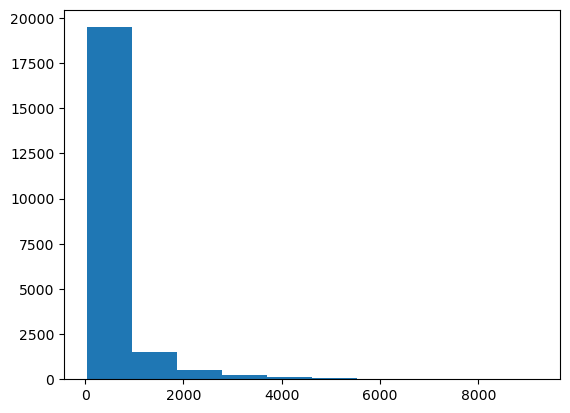

In [104]:
plt.hist(impact_scores['score'])

(array([1.9482e+04, 1.5370e+03, 4.8600e+02, 2.4700e+02, 1.0100e+02,
        4.5000e+01, 1.8000e+01, 3.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

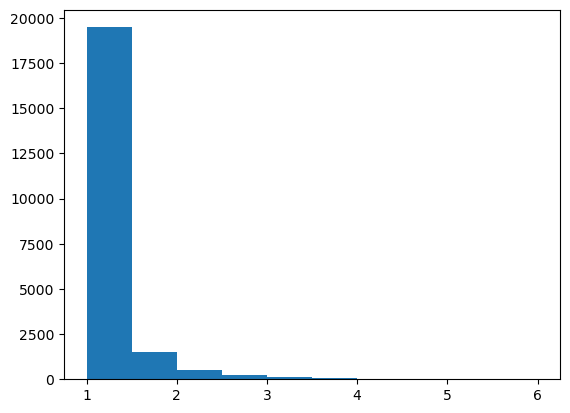

In [105]:
plt.hist(impact_scores['score_epfl'])

In [91]:
#Alternative method : 
#chose scales for different elements and cap every score above that scale? like above 10 appearances is max appearance score
#try np.logging the appearances
#try to add 1 appearance bias (as in appea = np.log(movies) + 1, would put cut off for doubling score at 2.718 / 3 movies? 

In [107]:
impact_scores['score'] = impact_scores['avg_rev_log'] * impact_scores['avg_score'] * impact_scores['appearances_log']
impact_scores['score_epfl'] = (minMaxScale(impact_scores['score']) * 5) + 1
impact_scores.head(3)

,actor,avg_rev_log,avg_score,appearances,appearances_log,score,score_epfl
0,Dustin_Farnum,15.626664,5.833333,1.0,0.693147,63.184206,1.389576
1,Elmer_Clifton,20.946409,6.600000,1.0,0.693147,95.825034,1.688465
2,Robert_Harron,20.946409,6.600000,1.0,0.693147,95.825034,1.688465


(array([3.871e+03, 8.564e+03, 3.968e+03, 2.312e+03, 1.440e+03, 9.170e+02,
        5.250e+02, 2.500e+02, 7.100e+01, 6.000e+00]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

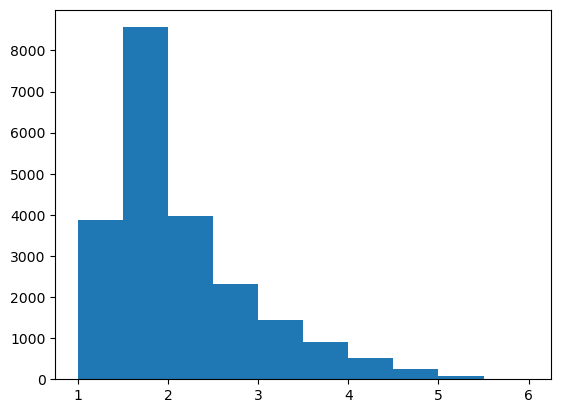

In [108]:
plt.hist(impact_scores['score_epfl'])

In [113]:
#without logging values the distribution illustrates some form of inequality ?
top_actors = impact_scores.sort_values(by = 'score_epfl', ascending = False).reset_index(drop = True)
top_actors.head(20)

,actor,avg_rev_log,avg_score,appearances,appearances_log,score,score_epfl
0,Samuel_L._Jackson,19.260612,6.925151,69.0,4.248495,566.675524,6.000000
1,Frank_Welker,19.313837,6.824645,60.0,4.110874,541.854662,5.772718
2,Tom_Hanks,19.486964,7.078225,46.0,3.850148,531.062886,5.673898
3,Robert_De_Niro,18.641239,6.924688,58.0,4.077537,526.347950,5.630724
4,Nicolas_Cage,18.555561,6.842724,59.0,4.094345,519.861327,5.571327
5,Bruce_Willis,18.935198,6.665169,60.0,4.110874,518.818128,5.561774
6,Robin_Williams,19.102365,6.747560,52.0,3.970292,511.748233,5.497036
7,Liam_Neeson,18.942864,6.933168,48.0,3.891820,511.128535,5.491361
8,Gene_Hackman,18.780119,6.981377,47.0,3.871201,507.557413,5.458661
9,Morgan_Freeman,19.066961,6.833796,48.0,3.891820,507.103099,5.454501


In [114]:
best_imdb_actors = impact_scores.sort_values(by = 'avg_score', ascending = False).reset_index(drop = True)
best_imdb_actors.head(20)

,actor,avg_rev_log,avg_score,appearances,appearances_log,score,score_epfl
0,Flávio_Galvão,14.959763,9.80,1.0,0.693147,101.619311,1.741523
1,Tania_Boscoli,14.959763,9.80,1.0,0.693147,101.619311,1.741523
2,Antonio_Cantafora,14.959763,9.80,1.0,0.693147,101.619311,1.741523
3,Lutero_Luiz,14.959763,9.80,1.0,0.693147,101.619311,1.741523
4,Nicole_Puzzi,14.959763,9.80,1.0,0.693147,101.619311,1.741523
5,Maurício_do_Valle,14.959763,9.80,1.0,0.693147,101.619311,1.741523
6,Nildo_Parente,14.959763,9.80,1.0,0.693147,101.619311,1.741523
7,Ivan_Mesquita,14.959763,9.80,1.0,0.693147,101.619311,1.741523
8,Luiz_Linhares,14.959763,9.80,1.0,0.693147,101.619311,1.741523
9,Paulo_Goulart,14.959763,9.80,1.0,0.693147,101.619311,1.741523


In [116]:
#interesting af that it changes